# Prediction of High School Students' Academic Performance
Author: Zhang Zhang

Course Project, UC Irvine, Math 10, Fall 24

I would like to post my notebook on the course's website. [Yes]

## Introduction

Students' Academic performance can be influenced by multiple factors. In this project, we aim to do a multi-classification of a large set of high school student's grade base on their behaviors. Different models, such as Logistic Regression, Support Vector Machine, Random Forest, KNN, Neural Network is attempted in this project. The target variable, **GradeClass**, categorizes students' grades, making the dataset ideal for educational research, predictive modeling, and statistical analysis. 

## Data Pre-processing

The [dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) chosed in this project contains comprehensive information of **2392 high school students**. It gives both numerical and categorical data of each student to reflect their school performance related aspects. In this section, we will pre-process the data, including loading, cleaning, and transforming the raw data into a format suitable for model training and analysis. Also, we will have a overall impression on the dataset. 

Here we first load the dataset and drop all null values. For convenience, we remapped the GradeClass variable from 0.0-4.0 to 1-5, while 1 means A class and 5 points to F class.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
data_path = 'Student_performance_data _.csv'
df = pd.read_csv(data_path)
df = df.dropna()
df.columns = df.columns.str.strip()
grade_mapping = {0.0: 1, 1.0: 2, 2.0: 3, 3.0: 4, 4.0: 5}
df['GradeClass'] = df['GradeClass'].replace(grade_mapping)
print(df['GradeClass'].value_counts())
df.head(10)


GradeClass
5.0    1211
4.0     414
3.0     391
2.0     269
1.0     107
Name: count, dtype: int64


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,2.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,5.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,4.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,5.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,2.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,3.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,5.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,3.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,1.0


Check if there's any null value in the dataset.

In [2]:
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Print the basic information of the dataset. 'StudentID' is a unique identifier assigned to each student (1001 to 3392). Since 'StudentID' is useless for the project's purpose, so we dropped it. 

In [3]:
df.info()
df.drop(['StudentID'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,3.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,2.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,5.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,4.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,5.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,3.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,2.0


## Explorotory Data Analysis

In this section, we will explore the pattern lies in the data and try to find the relationship between each variables to better understand the dataset. 


### GPA and GradeClass

GPA is the Grade Point Average on a scale from 2.0 to 4.0, influenced by other features in the dataset. GPA is the numerical reflection of a student's overall academic performance. However, for this project's purpose, we want to predict the classification of students' academic performace. So we use 'GradeClass' as the target variable instead of GPA. 

GradeClass mapped students' GPA to grade classes. 
0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

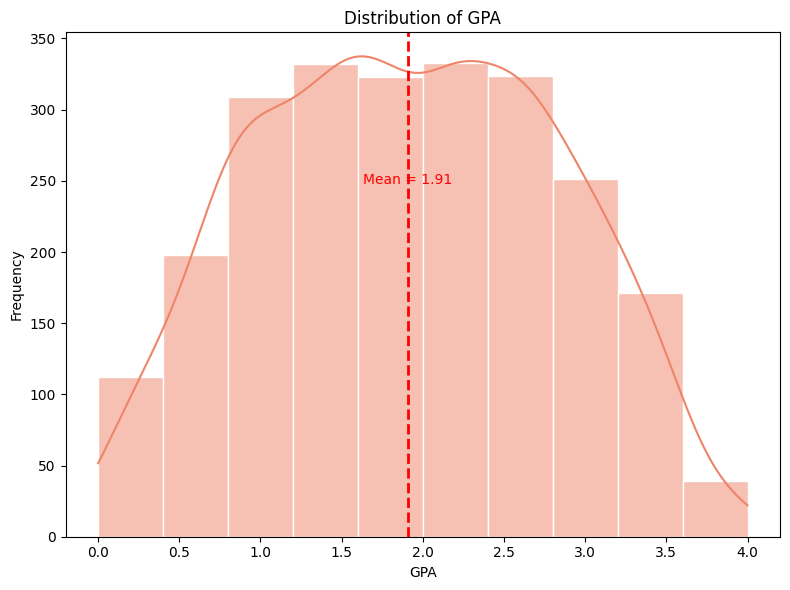

In [4]:
mean = np.mean(df['GPA'])
plt.figure(figsize=(8, 6))
sns.histplot(df['GPA'], bins=10, kde=True, color=cm.coolwarm(0.8), edgecolor='white')
plt.axvline(mean, color='red', linestyle='--', linewidth=2)
plt.text(mean, plt.ylim()[1] * 0.7, f'Mean = {mean:.2f}', color='red', ha='center')

plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution of GPA appears to be approximately normal, with a slight skew to the left. This means that the majority of GPA fall around the middle range, with fewer students at the extremes (very low or very high GPAs).

C:\Users\Lillian\AppData\Local\Temp\ipykernel_30244\2880979547.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels)


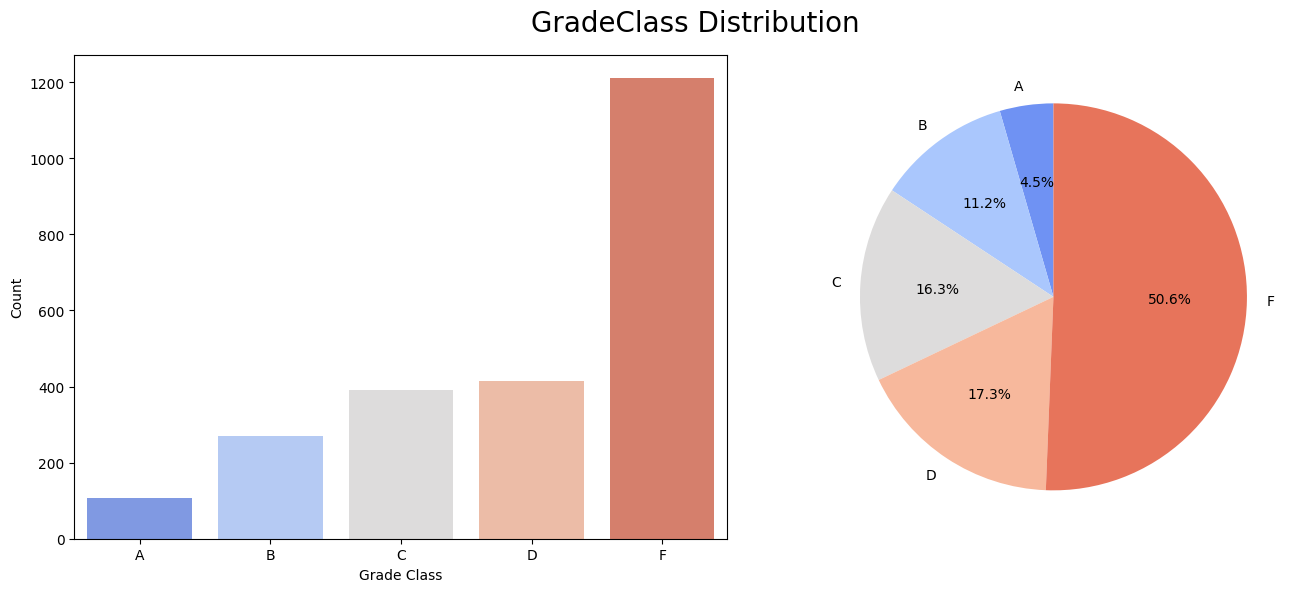

In [5]:
grade_counts = df['GradeClass'].value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
labels=['A', 'B', 'C', 'D', 'F']
sns.countplot(data=df, x='GradeClass',palette=sns.color_palette("coolwarm", n_colors=len(grade_counts)),ax=ax1)
ax1.set_xlabel('Grade Class')
ax1.set_ylabel('Count')
ax1.set_xticklabels(labels)
ax2.pie(grade_counts, labels=labels,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", n_colors=len(grade_counts)))
plt.suptitle('GradeClass Distribution',fontsize=20)
plt.tight_layout()
plt.show()

The distribution of the total GradeClass is left-skewed, indicating the counts of students is ascending as grade descending. However, the counts of cases in the majority class(F class) greatly outweighs the minority class(A class). This imbalanced dataset may lead to some problems when training the data.

### Other Features

Despite the 'GPA' and 'GradeClass' columns in the dataset, there are 12 features provided in each student's info. The 12 features are classified into four groups to better explain the data: **Demographic features, Study habits, Parental Involvement, and Extracurricular**

In [6]:
features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 
            'StudyTimeWeekly','Absences', 'Tutoring','ParentalSupport',  
            'Extracurricular','Sports', 'Music', 'Volunteering']


#### Demographic Features Analysis

Features in the demographic group represents the following:

**Age**: The age of the students ranges from 15 to 18 years. The data is discrete.

**Gender**: Gender of the students, where 0 represents Male and 1 represents Female.

**Ethnicity**: The ethnicity of the students, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other

**ParentalEducation**: The education level of the parents, coded as follows:

0: None

1: High School

2: Some College

3: Bachelor's

4: Higher

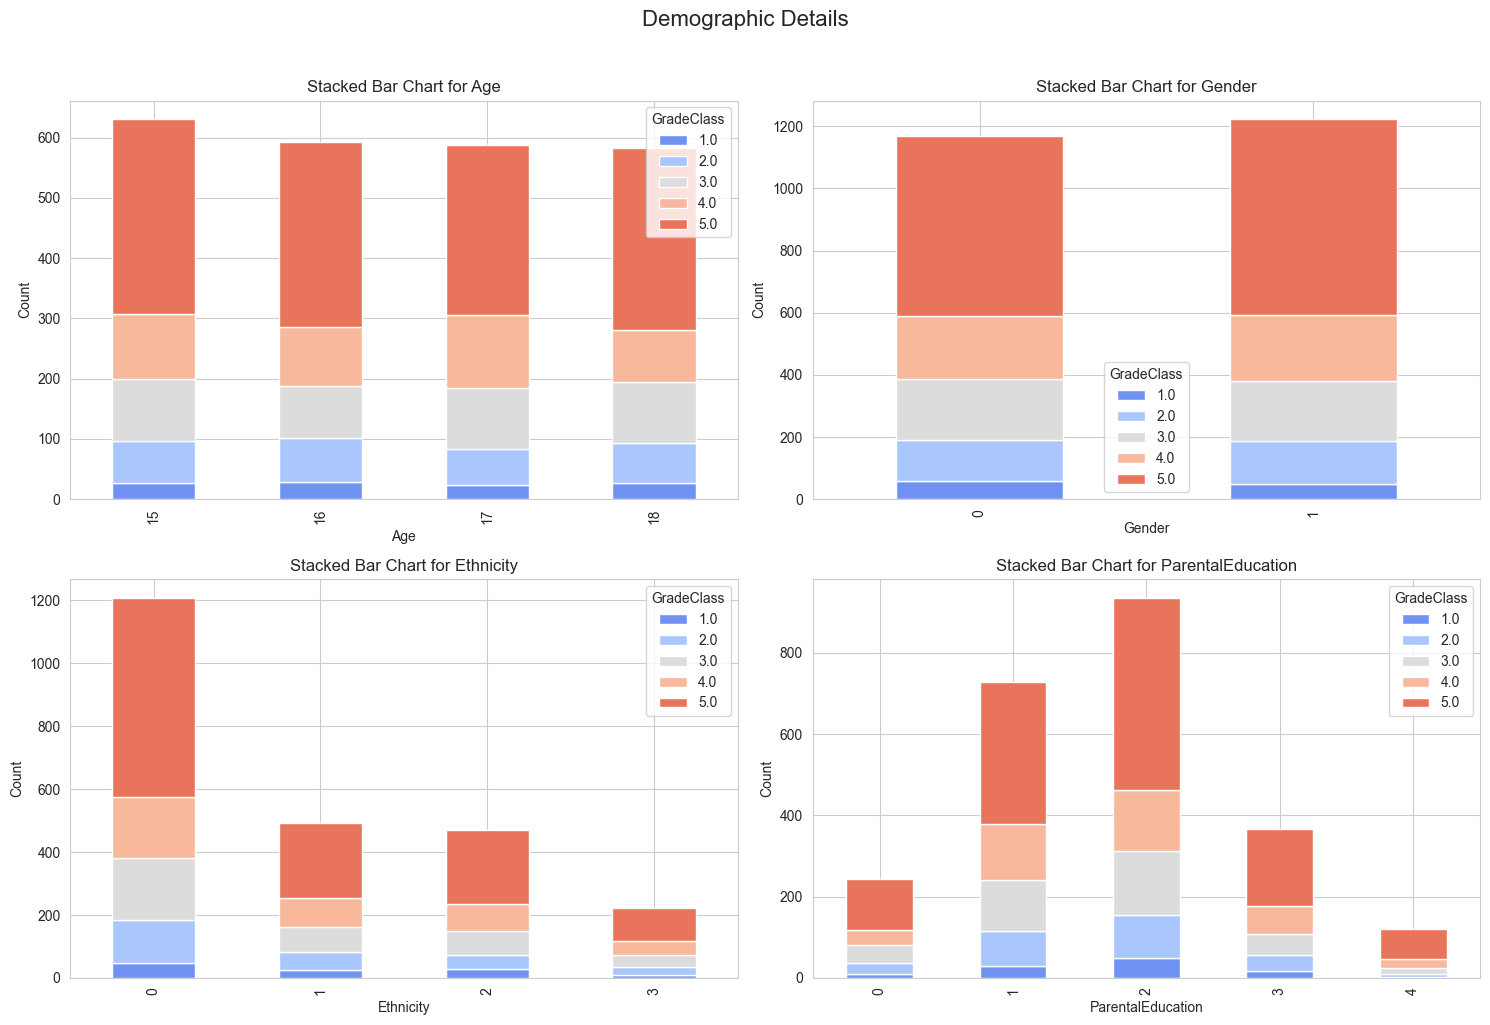

In [7]:
demographic_features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation']
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Demographic Details", fontsize=16, y=1.02)
fig.tight_layout(pad=5.0)

for i, feature in enumerate(demographic_features):
    row = i // 2  
    col = i % 2  
    ax = axes[row, col]
    grade_class_counts = pd.crosstab(df[feature], df['GradeClass'])
    grade_class_counts.plot(kind='bar', stacked=True, ax=ax, 
                            color=sns.color_palette("coolwarm", len(grade_class_counts.columns)))

    ax.set_title(f'Stacked Bar Chart for {feature}')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
plt.tight_layout()
plt.show()

 **Demographic Patterns**:
   - **Age**: GradeClass distributions are relatively similar across ages 15-18, suggesting consistent academic performance trends regardless of age.
   - **Gender**: Both genders show a similar distribution of GradeClass, indicating no significant performance disparity between male and female students.
   - **Ethnicity**: The majority of students belong to the Caucasian group (code 0), dominating all GradeClass levels. Other ethnic groups (codes 1, 2, 3) show smaller and more varied distributions across GradeClass levels.
   - **Parental Education**: Higher levels of parental education (codes 3 and 4) are associated with better grade distributions, reflecting the potential influence of educational background on student success.

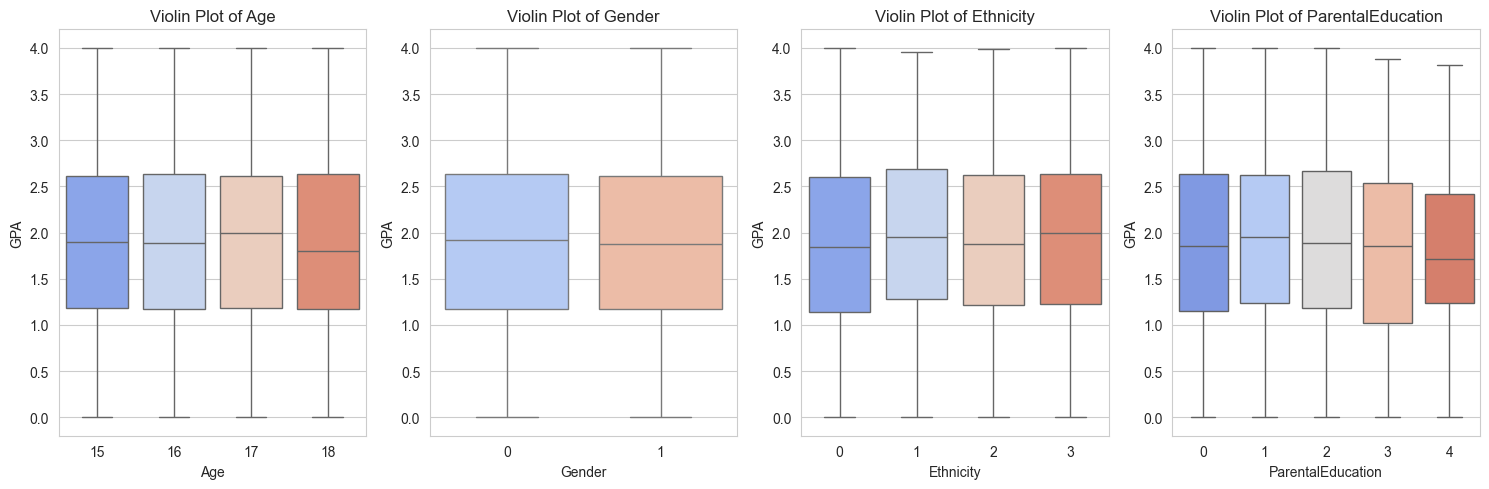

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=len(demographic_features), figsize=(15, 5))
fig.tight_layout(pad=7.0)

for i, feature in enumerate(demographic_features):
    sns.boxplot(data=df, x=feature, y='GPA', ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Violin Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('GPA')

plt.tight_layout()
plt.show()

The boxplot shows there isn't a strong correlation between these features and students' GPA. 

#### Study Habits

**StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.

**Absences**: Number of absences during the school year, ranging from 0 to 30.

**Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.

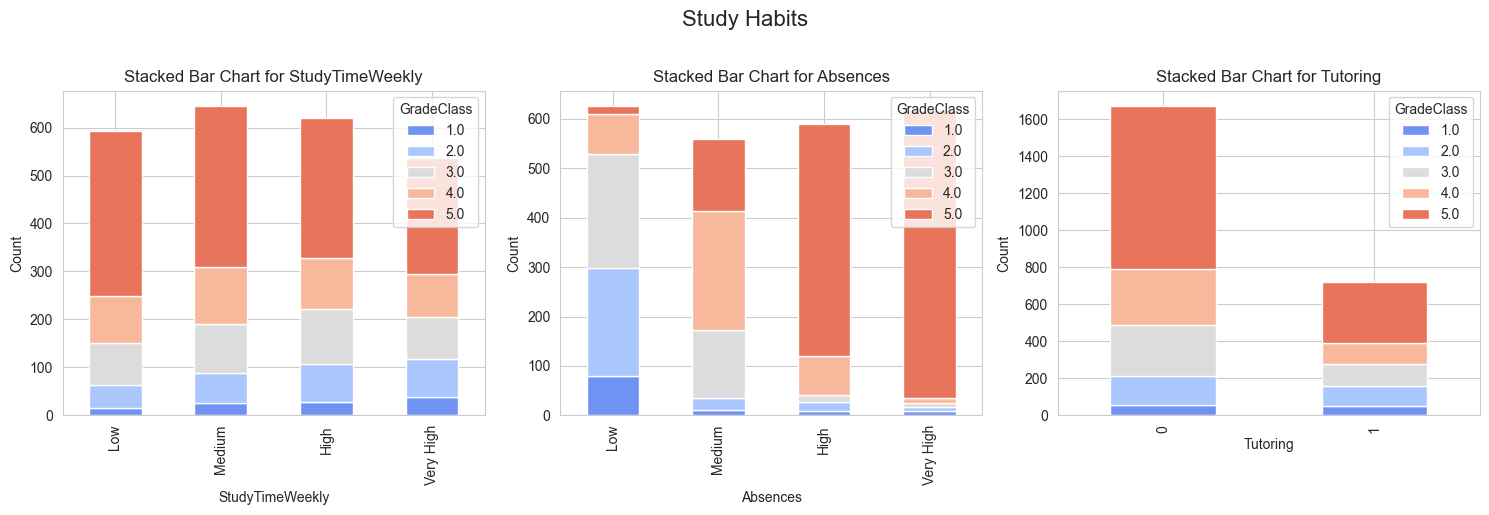

In [9]:
study_habits_features = ['StudyTimeWeekly', 'Absences', 'Tutoring']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Study Habits", fontsize=16, y=1.02)
fig.tight_layout(pad=5.0)

for i, feature in enumerate(study_habits_features):
    ax = axes[i]

    if feature in ['StudyTimeWeekly', 'Absences']:
        bins = pd.cut(df[feature], bins=4, labels=["Low", "Medium", "High", "Very High"])
        grade_class_counts = pd.crosstab(bins, df['GradeClass'])
        grade_class_counts.plot(kind='bar', stacked=True, ax=ax, 
                                color=sns.color_palette("coolwarm", len(grade_class_counts.columns)))

    else:
        grade_class_counts = pd.crosstab(df[feature], df['GradeClass'])
        grade_class_counts.plot(kind='bar', stacked=True, ax=ax, 
                                color=sns.color_palette("coolwarm", len(grade_class_counts.columns)))

    ax.set_title(f'Stacked Bar Chart for {feature}')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
plt.tight_layout()
plt.show()

**Study Time Weekly**

As study time increases, the proportion of higher Grade Classes also increases. This suggests a positive correlation between study time and academic performance. Students who study very high hours tend to have a higher proportion of higher Grade Classes.

**Absences**

Students with very high absences have a significantly higher proportion of lower Grade Classes. As the number of absences increases, the proportion of lower Grade Classes also increases. This indicates a negative correlation between absences and academic performance.

**Tutoring**

Students who receive tutoring seem to have a higher proportion of higher Grade Classes, particularly in the highest Grade Class. This suggests that tutoring can have a positive impact on academic performance.

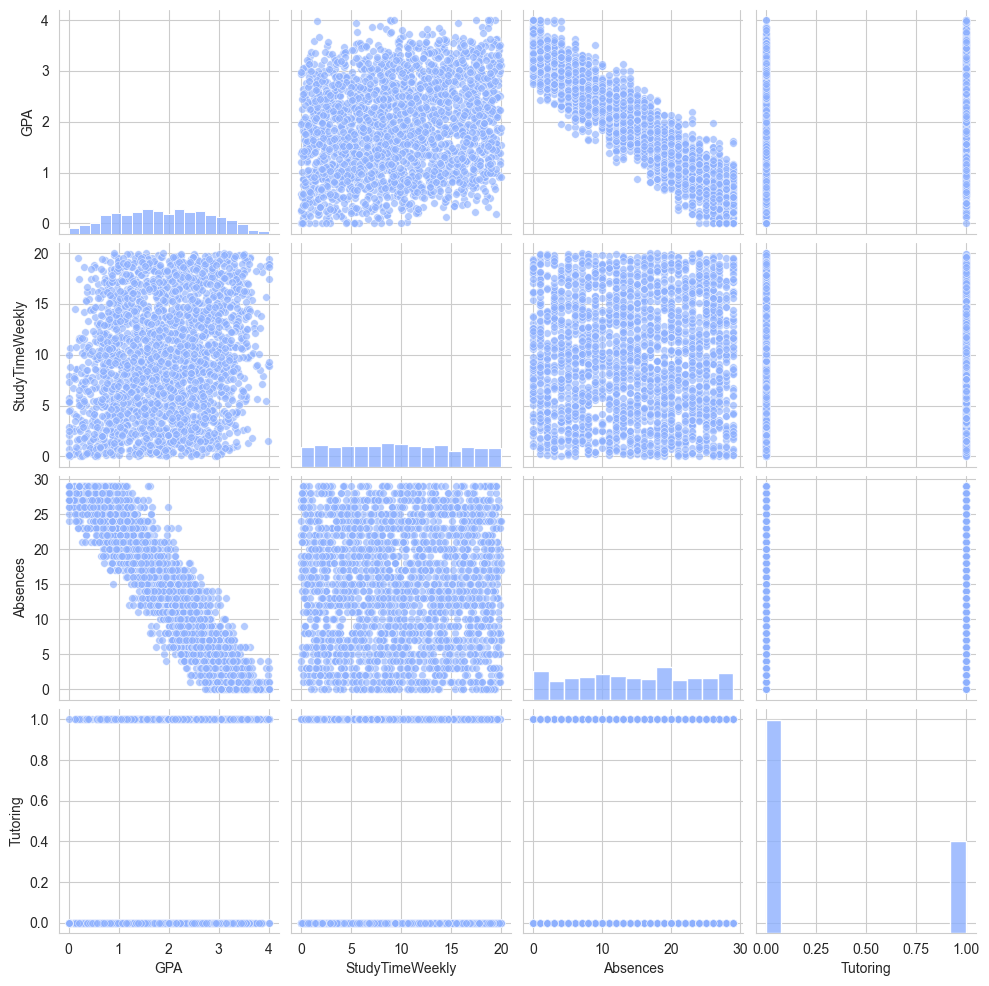

In [10]:
sns.pairplot(df[['GPA']+study_habits_features],plot_kws = {'color':cm.coolwarm(0.25), 'alpha': 0.65, 's': 30, 'edgecolor': 'w'},diag_kws= {'color':cm.coolwarm(0.25), 'alpha': 0.8, 'edgecolor':'w'})
plt.show()

The pairplot better shows the scatter distribution. 

#### Parental Involvement

**ParentalSupport**: The level of parental support, coded as follows:

0: None

1: Low

2: Moderate

3: High

4: Very High

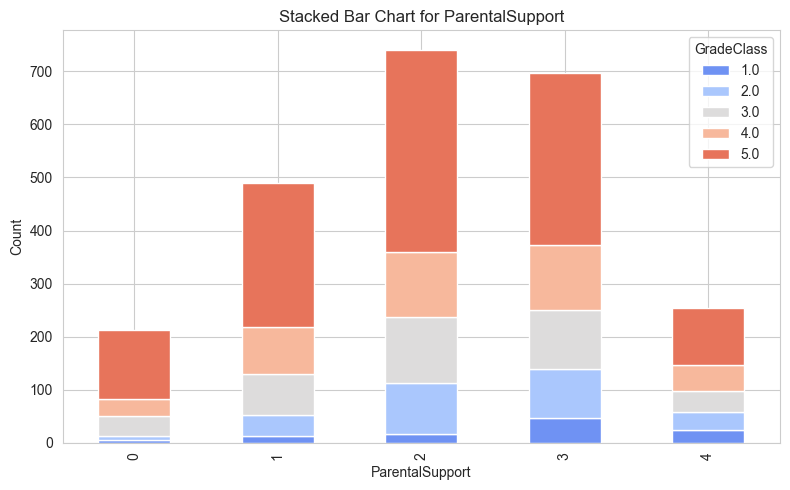

In [11]:
parental_features = ['ParentalSupport']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
fig.tight_layout(pad=5.0)

for feature in parental_features:
    grade_class_counts = pd.crosstab(df[feature], df['GradeClass'])
    grade_class_counts.plot(kind='bar', stacked=True, ax=ax, 
                            color=sns.color_palette("coolwarm", len(grade_class_counts.columns)))

    ax.set_title(f'Stacked Bar Chart for {feature}')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
plt.tight_layout()
plt.show()

**Parental Support**:
   - Students with moderate (code 2) and high (code 3) levels of parental support are overrepresented in higher GradeClass levels (4 and 5), suggesting a positive correlation between parental support and academic performance.
   - Minimal or no parental support (codes 0 and 1) correlates with a higher concentration in lower GradeClass levels.

#### Extracurricular

**Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

**Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.

**Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.

**Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

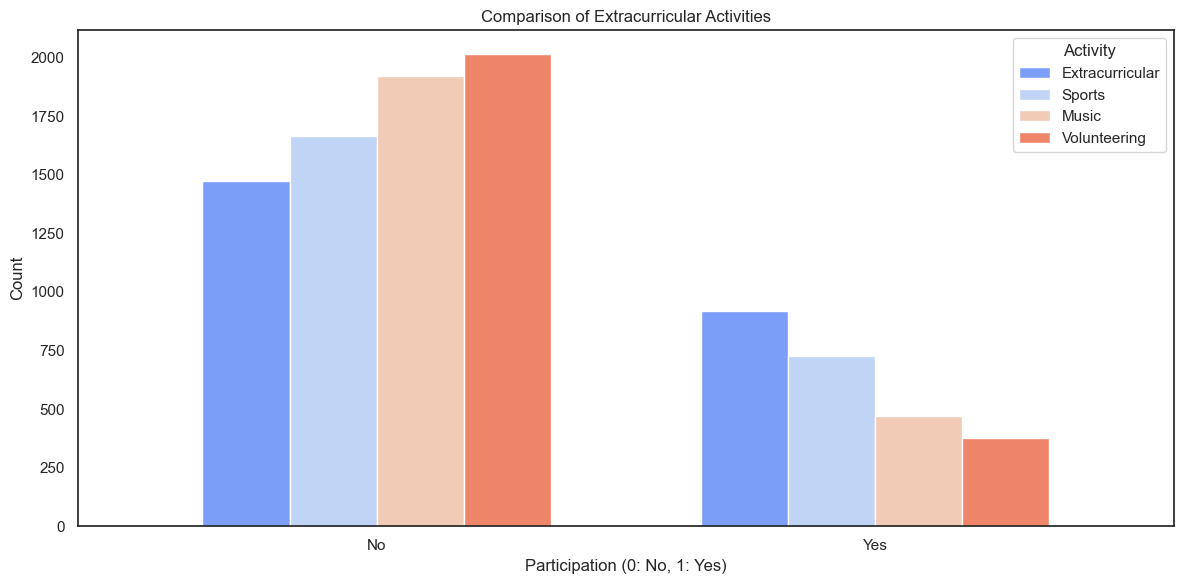

In [12]:
extracurricular_features = ['Extracurricular', 'Sports', 'Music', 'Volunteering']
counts = {feature: df[feature].value_counts() for feature in extracurricular_features}
sns.set_theme(style='white')

counts_df = pd.DataFrame(counts)

counts_df.plot(kind='bar', figsize=(12, 6), width=0.7, edgecolor='w', color=sns.color_palette("coolwarm", len(extracurricular_features)))

plt.title("Comparison of Extracurricular Activities")
plt.xlabel("Participation (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title="Activity", loc="upper right")

plt.tight_layout()
plt.show()

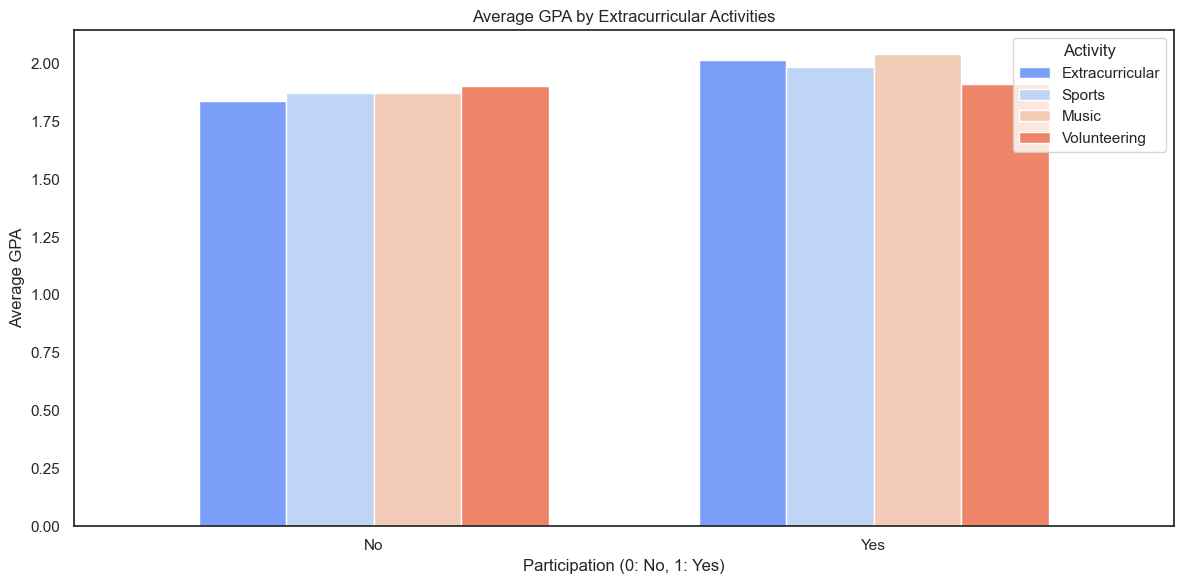

In [ ]:
avg_gpa = {feature: df.groupby(feature)['GPA'].mean() for feature in extracurricular_features}

avg_gpa_df = pd.DataFrame(avg_gpa)

avg_gpa_df.plot(kind='bar', figsize=(12, 6), width=0.7, edgecolor='w', color=sns.color_palette("coolwarm", len(extracurricular_features)))

plt.title("Average GPA by Extracurricular Activities")
plt.xlabel("Participation (0: No, 1: Yes)")
plt.ylabel("Average GPA")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title="Activity", loc="upper right")

plt.tight_layout()
plt.show()

The side-by-side graph demonstrates that the participation in extracurricular and other activities does have positive impact on student's GPA, especially for activities like music and extracurricular kind.

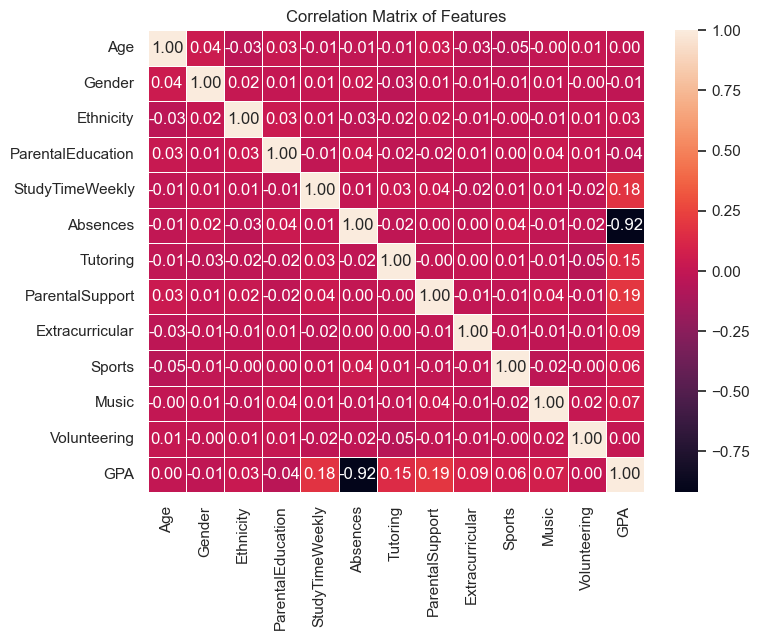

In [14]:
corr_matrix = df.drop(columns=['GradeClass','StudentID']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True,fmt='.2f', linewidths=0.5,cmap='rocket')
plt.title('Correlation Matrix of Features')
plt.show()

Most of the features show weak or no correlation with GPA, indicating that these factors may not have a significant impact on academic performance.  Parental Support, Study Time Weekly, and Tutoring has slightly positive correlation with GPA. Notably, Absences has strong negative correlation with GPA. 

## Methodology

In this section, we will examine 4 models' performances on predicting the GradeClass of students, including Logistic Regression, Support Vector Machine, KNN, and Neural Network.

### Logistic Regression

[Logistic regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) is beneficial for its **simplicity, interpretability, and efficiency**, especially in binary or categorical classification tasks. Since we are expecting to do a multi-classification with many categorical variables, Logistic Regression is a primary choice.
 Unlike complex models, it is computationally efficient, works well with smaller datasets, and is less prone to overfitting when compared to more complex models like neural networks. Additionally, it handles multicollinearity better than some alternatives through regularization techniques.

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.07      0.12        14
         2.0       0.63      0.52      0.57        52
         3.0       0.65      0.66      0.65        87
         4.0       0.58      0.59      0.59        66
         5.0       0.90      0.96      0.93       260

    accuracy                           0.78       479
   macro avg       0.62      0.56      0.57       479
weighted avg       0.76      0.78      0.77       479



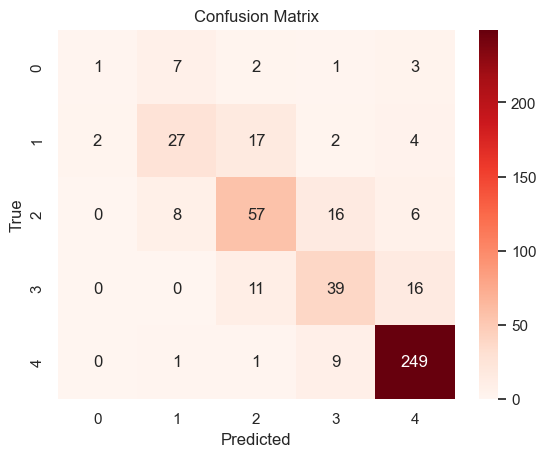

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[features]
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)

y_pred_lr = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {acc:.2f}')

report = classification_report(y_test, y_pred_lr)
print('Classification Report:')
print(report)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix and the classification report, the model's performance on this dataset is geerally great. However, the precision of the class 1('GradeClass':1.0) is low, indicating that the dataset's imbalance has largely affected the model's prediction on minority class. 

In [16]:
train_accuracy = clf.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

test_accuracy = clf.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean():.2f}')

Training Accuracy: 0.73
Test Accuracy: 0.78
Cross-validation scores: [0.75574113 0.71607516 0.73012552 0.76150628 0.60041841]
Mean cross-validation score: 0.71


From the accuracy and cross-validation scores, we have making sure that the model is not overfitting.

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=34)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)
y_pred_lr2 = model.predict(X_test)
print(classification_report(y_test, y_pred_lr2))

              precision    recall  f1-score   support

         1.0       0.07      0.29      0.11        14
         2.0       0.47      0.35      0.40        52
         3.0       0.60      0.38      0.46        87
         4.0       0.30      0.39      0.34        66
         5.0       0.88      0.81      0.84       260

    accuracy                           0.61       479
   macro avg       0.46      0.44      0.43       479
weighted avg       0.68      0.61      0.64       479



To address the class outweigh problem, we try to use the SMOTE method to resample the data and balance the classes. However, the output doesn't seem to improve the model's performance.

In [18]:
coefficients = clf.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance_sorted)


              Feature  Coefficient  Absolute Coefficient
6            Tutoring     0.937286              0.937286
8     Extracurricular     0.794371              0.794371
7     ParentalSupport     0.593448              0.593448
9              Sports     0.283565              0.283565
5            Absences    -0.200093              0.200093
11       Volunteering    -0.150882              0.150882
10              Music     0.107792              0.107792
1              Gender    -0.103360              0.103360
2           Ethnicity     0.080243              0.080243
4     StudyTimeWeekly     0.073835              0.073835
0                 Age    -0.033343              0.033343
3   ParentalEducation     0.002714              0.002714


To improve the model's performance, we try to modify on the features. First, we sorted the coefficients of the features to see the feature importance.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sorted_features = ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 
                   'Volunteering', 'Music', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Age', 'ParentalEducation']

X = df[sorted_features]  
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

model = LogisticRegression(max_iter=10000)

results = []
for i in range(7, len(sorted_features) + 1):
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    model.fit(X_train_selected, y_train)
    
    y_pred_lr3 = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred_lr3)

    results.append((accuracy, i, selected_features))

results_sorted = sorted(results, key=lambda x: x[0], reverse=True)

for accuracy, num_features, selected_features in results_sorted:
    print(f"Model with {num_features} features: {selected_features}, Accuracy: {accuracy:.4f}")


Model with 11 features: ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Age'], Accuracy: 0.7787
Model with 12 features: ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Age', 'ParentalEducation'], Accuracy: 0.7787
Model with 10 features: ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music', 'Gender', 'Ethnicity', 'StudyTimeWeekly'], Accuracy: 0.7724
Model with 8 features: ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music', 'Gender'], Accuracy: 0.7265
Model with 7 features: ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music'], Accuracy: 0.7244
Model with 9 features: ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music', 'Gender', 

By modifying and grouping the top importance features with different trials, we obtained the best combination of features: removing the 'ParentalEducation' feature.

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

         1.0       0.25      0.07      0.11        14
         2.0       0.63      0.56      0.59        52
         3.0       0.64      0.62      0.63        87
         4.0       0.55      0.56      0.56        66
         5.0       0.90      0.96      0.93       260

    accuracy                           0.77       479
   macro avg       0.59      0.55      0.56       479
weighted avg       0.76      0.77      0.76       479



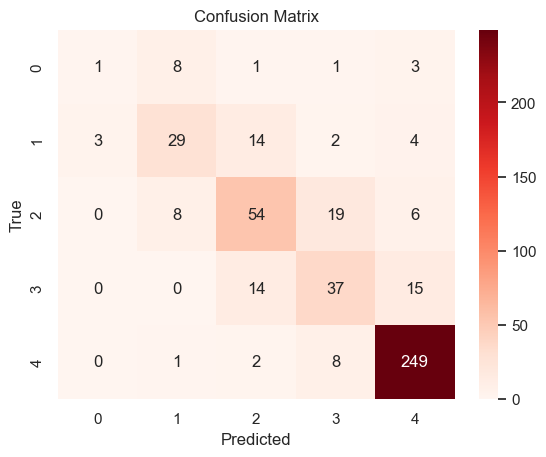

In [20]:
features_2 = ['Tutoring', 'Extracurricular', 'ParentalSupport', 'Sports', 'Absences', 'Volunteering', 'Music', 'Gender', 'Ethnicity', 'StudyTimeWeekly']
X = df[features_2]
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)

y_pred_lr3 = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_lr3)
print(f'Accuracy: {acc:.2f}')

report = classification_report(y_test, y_pred_lr3)
print('Classification Report:')
print(report)

cm = confusion_matrix(y_test, y_pred_lr3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Training and testing the logistic regression model again with new feature combination, the output is still close to the original one. This means that the combinations of the features doesn't influence the model a lot.

### Support Vector Machine

Considering the the high dimensionality of the dataset, we expect [SVM](https://scikit-learn.org/1.5/modules/svm.html) to perform better than logistic regression model on this classification task.
Additionally, from EDA, we noticed that many data has markable outliers, the concept of soft margins allows SVM to tolerate some misclassified points, making it more robust to outliers.

Accuracy: 0.778705636743215
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        14
         2.0       0.64      0.69      0.67        52
         3.0       0.70      0.63      0.66        87
         4.0       0.53      0.64      0.58        66
         5.0       0.91      0.92      0.92       260

    accuracy                           0.78       479
   macro avg       0.55      0.58      0.56       479
weighted avg       0.76      0.78      0.77       479



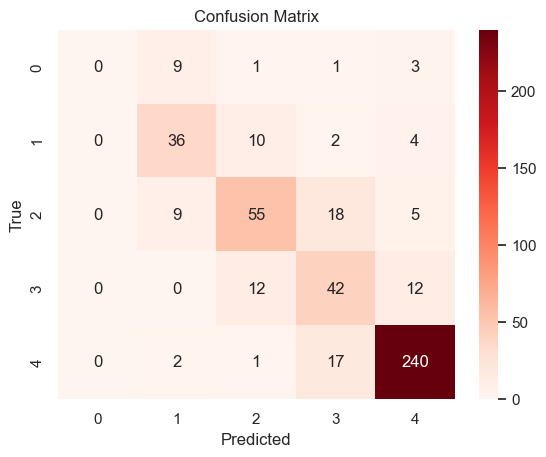

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df[features]
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

model = SVC(kernel='linear', random_state=34,gamma=0.01)
model.fit(X_train, y_train)

y_pred_svm = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_svm,zero_division=0))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Although the accuracy of the prediction doesn't increase, the precision of the middle classes(code 2 and 3) has increased.

### K-Nearest-Neighbor Classification

By considering the proximity of data points, [KNN](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) can capture local patterns and relationships, which is particularly useful in understanding how different features relate to the target variable. Additionally, the intuitive nature of KNN provides a straightforward way to interpret the influence of features on the outcome, aligning well with the goal of gaining insights into the dataset.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_knn, zero_division=0))

Accuracy: 0.7390396659707724
Classification Report:
              precision    recall  f1-score   support

         1.0       0.29      0.14      0.19        14
         2.0       0.54      0.37      0.44        52
         3.0       0.58      0.66      0.62        87
         4.0       0.51      0.55      0.53        66
         5.0       0.89      0.92      0.91       260

    accuracy                           0.74       479
   macro avg       0.56      0.53      0.54       479
weighted avg       0.73      0.74      0.73       479



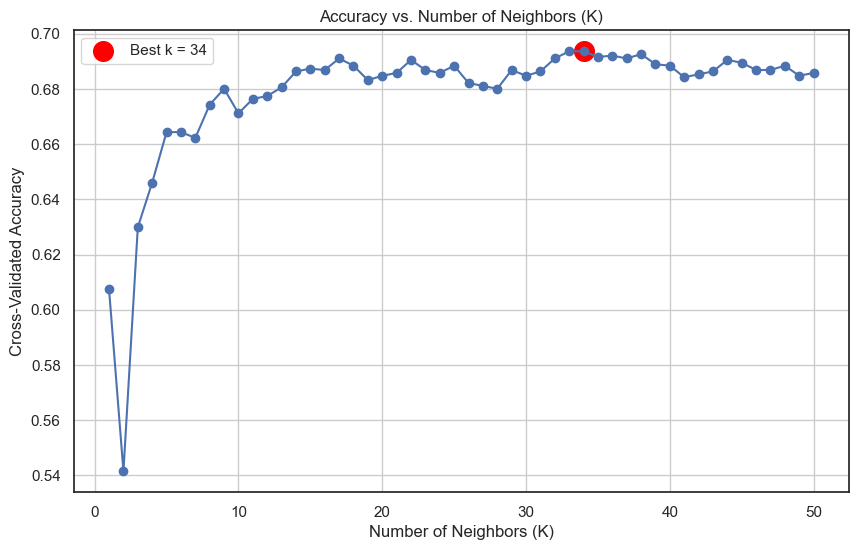

Best k value: 34
Best Cross-Val-Score: 0.6937
Accuracy: 0.7411273486430062
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        14
         2.0       0.51      0.44      0.47        52
         3.0       0.57      0.59      0.58        87
         4.0       0.53      0.59      0.56        66
         5.0       0.89      0.93      0.91       260

    accuracy                           0.74       479
   macro avg       0.50      0.51      0.50       479
weighted avg       0.72      0.74      0.73       479



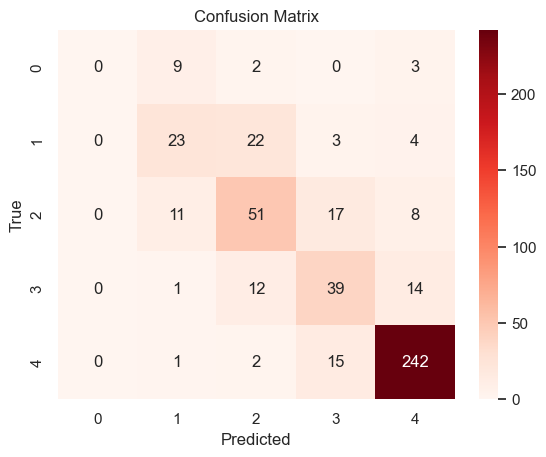

In [23]:
k_range = range(1, 51)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)

best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)

plt.scatter(best_k, best_score, color='red', s=200, label=f'Best k = {best_k}')
plt.legend()

plt.show()

print(f'Best k value: {best_k}')
print(f'Best Cross-Val-Score: {best_score:.4f}')

model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_knn, zero_division=0))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

 The output reflected the model's strong ability to correctly predict the majority class. The performance for smaller classes, such as Class 1, is notably poor, indicating the model fails to identify instances from minority classes.

Overall, KNN doesn't lead to a better performance compared to Logistic Regression.

### Neural Network

Given the diversity of the dataset, a [Neural Network](https://python-course.eu/machine-learning/neural-networks-with-scikit.php) (NN) is a suitable choice for modeling. Unlike simpler algorithms such as KNN, NN can capture intricate patterns and nonlinear relationships between features and the target variable. This capability is especially important for datasets with a mix of numerical and categorical features like this.

Accuracy: 0.7891440501043842
Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.29      0.42        14
         2.0       0.66      0.63      0.65        52
         3.0       0.69      0.61      0.65        87
         4.0       0.56      0.71      0.63        66
         5.0       0.92      0.93      0.92       260

    accuracy                           0.79       479
   macro avg       0.72      0.63      0.65       479
weighted avg       0.79      0.79      0.79       479



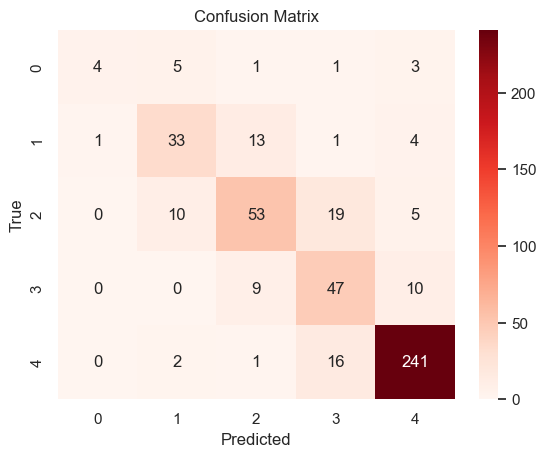

In [24]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_mlp, zero_division=0))
cm= confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

From the output of NN model, the NN model achieves slightly higher accuracy than the KNN model, indicating that it is better at overall predictions. This suggests that the NN can capture more complex relationships in the data, which is an advantage over KNN’s simpler, distance-based approach. Also, the NN shows improvements in precision and recall for some smaller classes, suggesting that it may have a better capacity to generalize when provided with sufficient data or optimized hyperparameters.

## Conclusion


In this project, we explored a dataset to analyze the factors influencing GPA, starting with an extensive exploratory data analysis (EDA). Through visualizations and statistical summaries, we identified key patterns and relationships among different feature groups. EDA provided valuable info, such as the significant impact of Absences on GPA, as well as the mixed effects of extracurricular participation.

To predict GPA categories, we implemented multiple models, including K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), and Neural Networks (NN). Each model was chosen for its ability to handle different complexities and provide meaningful comparisons. Logistic Regression and SVM offered simplicity and interpretability, while KNN and NN leveraged more nuanced patterns in the data.

Among the models, Logistic Regression and NN demonstrated competitive performance, effectively capturing the complexity of the dataset. While no model achieved perfect results, the analysis highlighted the importance of feature selection, data preprocessing, and model tuning in predictive tasks.